## Airbnb Data Set - the CRISP-DM Process

In the scope of this notebook the Airbnb Data Set will be analyzed in terms of the CRISP-DM process. 
This process contains the following steps:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

The data can be found here: https://www.kaggle.com/datasets/airbnb/seattle

# Business Understanding

The San Francisco based online platform for lodging, AirBnB, earns its profit from a commission for each booking on the platform since it does not own any of the properties on the platform. 
Someone who wants to offer his oder her property for a period of time uses the platform for advertisment. A listing can have multiple characteristics, e.g. number of bedrooms, super host etc.

Then anyone who is interested in an offer can contact the other party. 
AirBnB is the platform that matches offer and demand. 

The data that is used in this notebook contains a lot of information regarding listings in the Seattle area. 
The three questions that I want to answer with this notebook are:

1. When are the most listings available and how does that correspond to the average price? 
2. Which neighborhood as the highest amount of AirBnB listings?
3. How can the price for a new listing be predicted?

# Data Understanding

In order to answer the three questions I will use data from the *Seattle AirBnB Open Data*. The data includes information from 4th of January 2016 to 2nd of January 2017. 

The Data contains three datasets:

- listings
- reviews
- calendar

I will focus on the listings and calendar data. The calendar data contains information on the price of a certain listing on a certain day. Additionally, it tells wheather the listing is available or not. This dataset will help me to answer the first question. 

The listings data contains detailed information about the listings, e.g. price, number of bedrooms, neighborhood, reviews. It will therefore help to answer question 2. and 3..

First, I import all the necessary libraries as well as the datasets to get a first impression of the data. 

In [470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import re
%matplotlib inline

df_calendar = pd.read_csv('calendar.csv')
df_listing = pd.read_csv('listings.csv')


In [471]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [472]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [473]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [474]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Data Preparation

A first glance at the data showed that not all columns have the right data type. From the above observation, I conclude:

1. The type of the date column in the calendar dataset has to be switched to a date instead of an object
2. The price column in the calendar dataset should be converted into a numerical variable, e.g. int, double or float.
3. The price columns in the listings dataset should be converted into a numerical variable as well
4. There is categorical data in the listigs dataset that we need to handle using dummy variables

I will start with the preparation of the calendar dataset first.

In [475]:
df_calendar.date = pd.to_datetime(df_calendar.date)

In [476]:
def clean_price(x):
    if type(x) is str:
        return re.sub("[\$,]",'',x)
    else:
        return x

In [477]:
df_calendar.price = df_calendar.price.apply(clean_price)

In [478]:
df_calendar.price = df_calendar.price.astype(float)

A glance at the dataset now shows that the changes have worked. 

In [479]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


# Data Preparation - Handling missing values

Lets also have a look at missing data and the column *available*.
The price column has around 33% of missing values. A quick observation shows that all the missing price values come from listings that are not available. Since I want to look at the average price in my first question, it does not make sense to include missing values here. 

Therefore I exclude all rows from the dataset where *available* = *f*

<AxesSubplot:>

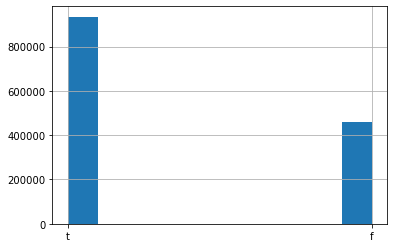

In [480]:
df_calendar.available.hist()

In [481]:
df_calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [482]:
null_val = df_calendar.price.isna().sum()
values = df_calendar.shape[0]
"The percentage of price values that is null is {}.".format(null_val/values)

'The percentage of price values that is null is 0.32938998399793334.'

In [483]:
df_calendar.groupby(['available']).mean()

,listing_id,price
available,,
f,6.048085e+06,NaN
t,5.305517e+06,137.944859


In [484]:
df_calendar = df_calendar[df_calendar['available'] == 't']

In [485]:
df_calendar.isna().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

# Data Preparation

Now, lets have a look on the listings dataset. For the questions I want to answer, I will have to look at the price. A first observation shows that the price is again not in the right format. 


In [486]:
df_listing['price'] = df_listing['price'].apply(clean_price)
df_listing['monthly_price'] = df_listing['monthly_price'].apply(clean_price)
df_listing['weekly_price'] = df_listing['weekly_price'].apply(clean_price)

In [487]:
df_listing['price']

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
         ...  
3813    359.00
3814     79.00
3815     93.00
3816     99.00
3817     87.00
Name: price, Length: 3818, dtype: object

In [488]:
df_listing['price'] = df_listing['price'].astype(float)
df_listing['monthly_price'] = df_listing['monthly_price'].astype(float)
df_listing['weekly_price'] = df_listing['weekly_price'].astype(float)

In [489]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# Data Preparation

Now that all price columns are in the right format I will impute missing values and have a look at the other colums of the dataset. Since the dataset is to huge, I will focus only on a few columns for my prediction. 

Therefore I create a new dataset that only contains relevant columns for the price prediction. This includes neighbourhood information as well as listing details. 

Also, I will check for missing values for the price columns. In order to get to a good price prediction I do not delete all rows with missing prices, but instead impute them. 

In [490]:
df_listing_features = df_listing[['price','accommodates','bathrooms','bedrooms','beds', 'monthly_price', 'weekly_price', 'instant_bookable','reviews_per_month','cancellation_policy', 'neighbourhood_group_cleansed']]

In [491]:
df_listing_features.isna().sum()

price                              0
accommodates                       0
bathrooms                         16
bedrooms                           6
beds                               1
monthly_price                   2301
weekly_price                    1809
instant_bookable                   0
reviews_per_month                627
cancellation_policy                0
neighbourhood_group_cleansed       0
dtype: int64

<AxesSubplot:>

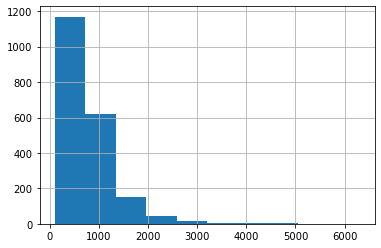

In [492]:
df_listing_features.weekly_price.hist()

<AxesSubplot:>

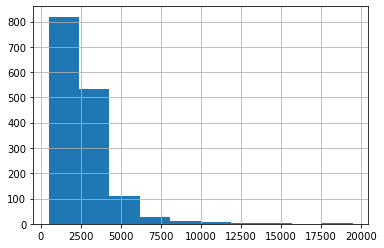

In [493]:
df_listing_features.monthly_price.hist()

In [494]:
df_listing_features.weekly_price.describe()

count    2009.000000
mean      788.481832
std       532.352269
min       100.000000
25%       455.000000
50%       650.000000
75%       950.000000
max      6300.000000
Name: weekly_price, dtype: float64

A look at the missing price values indicates that it might be smart to impute missing values with the median and not with the mean since the distribution is right-skewed.

In [495]:
num_vars_price = df_listing_features[['monthly_price','weekly_price']]
for var in num_vars_price:
    df_listing_features.loc[:,var] = df_listing_features[var].fillna(df_listing_features[var].median())

/Users/lena.rubeni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [496]:
num_vars = df_listing_features[['bathrooms','bedrooms', 'beds', 'reviews_per_month']]
for var in num_vars:
    df_listing_features.loc[:,var] = df_listing_features[var].fillna(df_listing_features[var].mean())

In [497]:
df_listing_features.isna().sum()

price                           0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
monthly_price                   0
weekly_price                    0
instant_bookable                0
reviews_per_month               0
cancellation_policy             0
neighbourhood_group_cleansed    0
dtype: int64

In [498]:
df_listing[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].value_counts()

neighbourhood      neighbourhood_cleansed  neighbourhood_group_cleansed
Capitol Hill       Broadway                Capitol Hill                    336
Belltown           Belltown                Downtown                        203
Fremont            Fremont                 Other neighborhoods             140
Wallingford        Wallingford             Other neighborhoods             139
Minor              Minor                   Central Area                    119
                                                                          ... 
Crown Hill         Whittier Heights        Ballard                           1
Maple Leaf         Wedgwood                Other neighborhoods               1
Eastlake           Portage Bay             Capitol Hill                      1
                   South Lake Union        Cascade                           1
North Beacon Hill  South Beacon Hill       Beacon Hill                       1
Length: 196, dtype: int64

Listing Data set

In [499]:
df_listing['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [500]:
num_vars = df_listing_features.select_dtypes(include=['int','float']).columns
for var in num_vars:
    df_listing_features.loc[:,var] = df_listing_features[var].fillna(df_listing_features[var].mean())

In [501]:
cat_bool_vars = df_listing_features.select_dtypes(include=['object','bool']).columns
cat_bool_vars
for var in cat_bool_vars:
    df_listing_features = pd.concat([df_listing_features.drop(var, axis=1), pd.get_dummies(df_listing_features[var], prefix=var, prefix_sep='_', drop_first=True)],
                         axis=1)

In [502]:
df_listing_features.head()

,price,accommodates,bathrooms,bedrooms,beds,monthly_price,weekly_price,reviews_per_month,instant_bookable_t,cancellation_policy_moderate,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,85.0,4,1.0,1.0,1.0,2200.0,650.0,4.070000,0,1,...,0,0,0,0,0,1,0,0,0,0
1,150.0,4,1.0,1.0,1.0,3000.0,1000.0,1.480000,0,0,...,0,0,0,0,0,1,0,0,0,0
2,975.0,11,4.5,5.0,7.0,2200.0,650.0,1.150000,0,0,...,0,0,0,0,0,1,0,0,0,0
3,100.0,3,1.0,0.0,2.0,2300.0,650.0,2.078919,0,0,...,0,0,0,0,0,1,0,0,0,0
4,450.0,6,2.0,3.0,3.0,2200.0,650.0,0.890000,0,0,...,0,0,0,0,0,1,0,0,0,0


# 1. Question: When are the most listings available and how does that correspond to the average price?

From the graphs below we can observe that the most listings are available towards the end of the year as well as during March and April. 
In the summer when less listings are available the average price is also the highest. 

In [503]:
df_calendar_plot1 = df_calendar[['date', 'listing_id']].groupby('date').count()
df_calendar_plot1.reset_index(inplace=True)
df_calendar_plot1

,date,listing_id
0,2016-01-04,1735
1,2016-01-05,1867
2,2016-01-06,1826
3,2016-01-07,1776
4,2016-01-08,1782
...,...,...
360,2016-12-29,2835
361,2016-12-30,2840
362,2016-12-31,2859
363,2017-01-01,2922


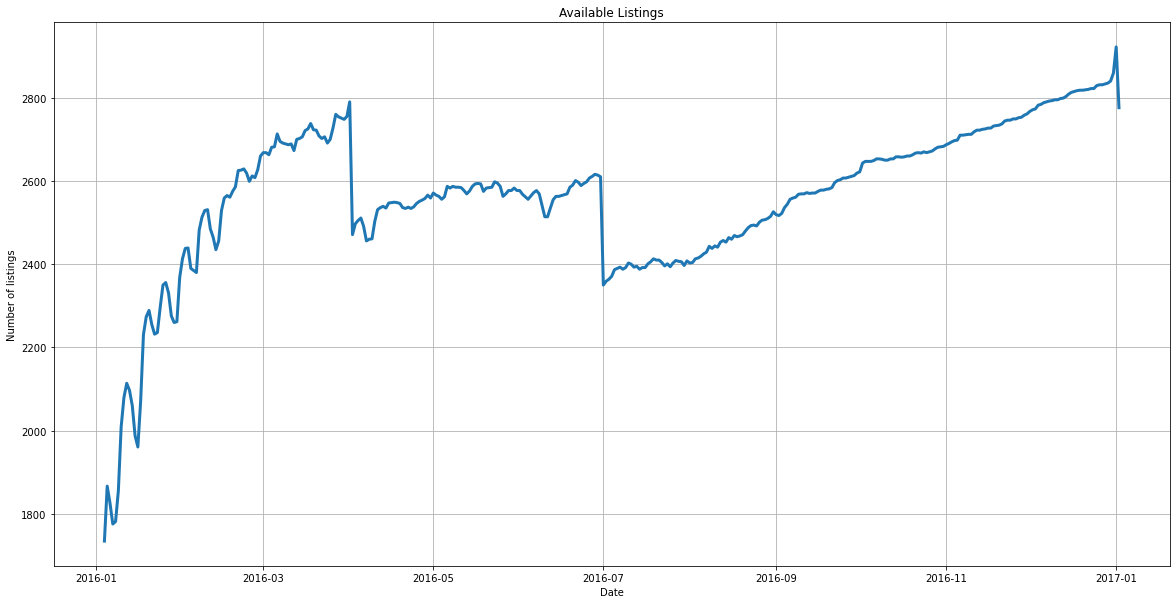

In [504]:
plt.figure(figsize=(20, 10))
x = df_calendar_plot1['date']
y = df_calendar_plot1['listing_id']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Date')
plt.ylabel('Number of listings')
plt.title('Available Listings')
plt.grid(True)
plt.show()

In [505]:
df_calendar_plot2 = df_calendar[['date', 'price']].groupby('date').mean()
df_calendar_plot2.reset_index(inplace=True)
df_calendar_plot2

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853
...,...,...
360,2016-12-29,138.045503
361,2016-12-30,144.738380
362,2016-12-31,145.698146
363,2017-01-01,138.126968


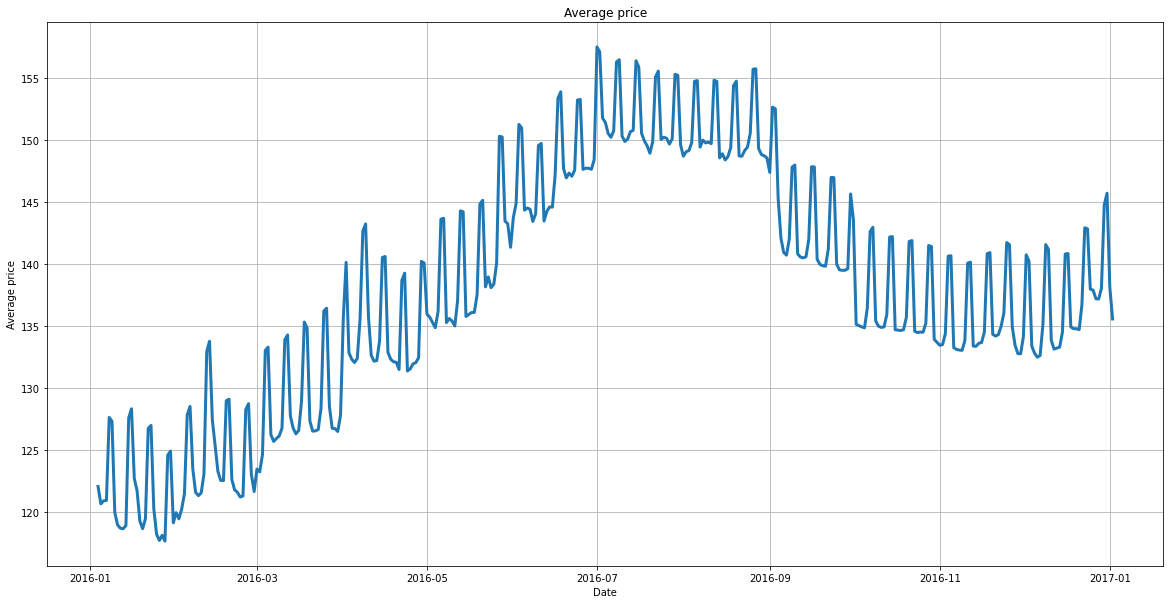

In [506]:
plt.figure(figsize=(20, 10))
x = df_calendar_plot2['date']
y = df_calendar_plot2['price']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Average price')
plt.grid(True)
plt.show()

# 2. Question: Which neighborhood has the highest amount of AirBnB listings?

Here, we can observe that a lot of listings are in *other neighbourhoods* which are not that expensive. *Central Area, Capitol Hill* and *Downtown* have most of the listings in their area. *Central Area* and *Downtown* are also quite expensive which is not the case for *Capitol Hill*. It is also really intersting to see that the *University District* is also quit expensive compared to the offers there. 

In [507]:
df_listing['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [508]:
df_listing[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').mean()

,price
neighbourhood_group_cleansed,
Ballard,124.682609
Beacon Hill,94.669492
Capitol Hill,130.592593
Cascade,140.101124
Central Area,128.338753
Delridge,83.278481
Downtown,154.405660
Interbay,109.727273
Lake City,92.671642


In [509]:
df_listing_plot1 = df_listing[['neighbourhood_group_cleansed', 'id']].groupby('neighbourhood_group_cleansed').count()
df_listing_plot1.reset_index(inplace=True)

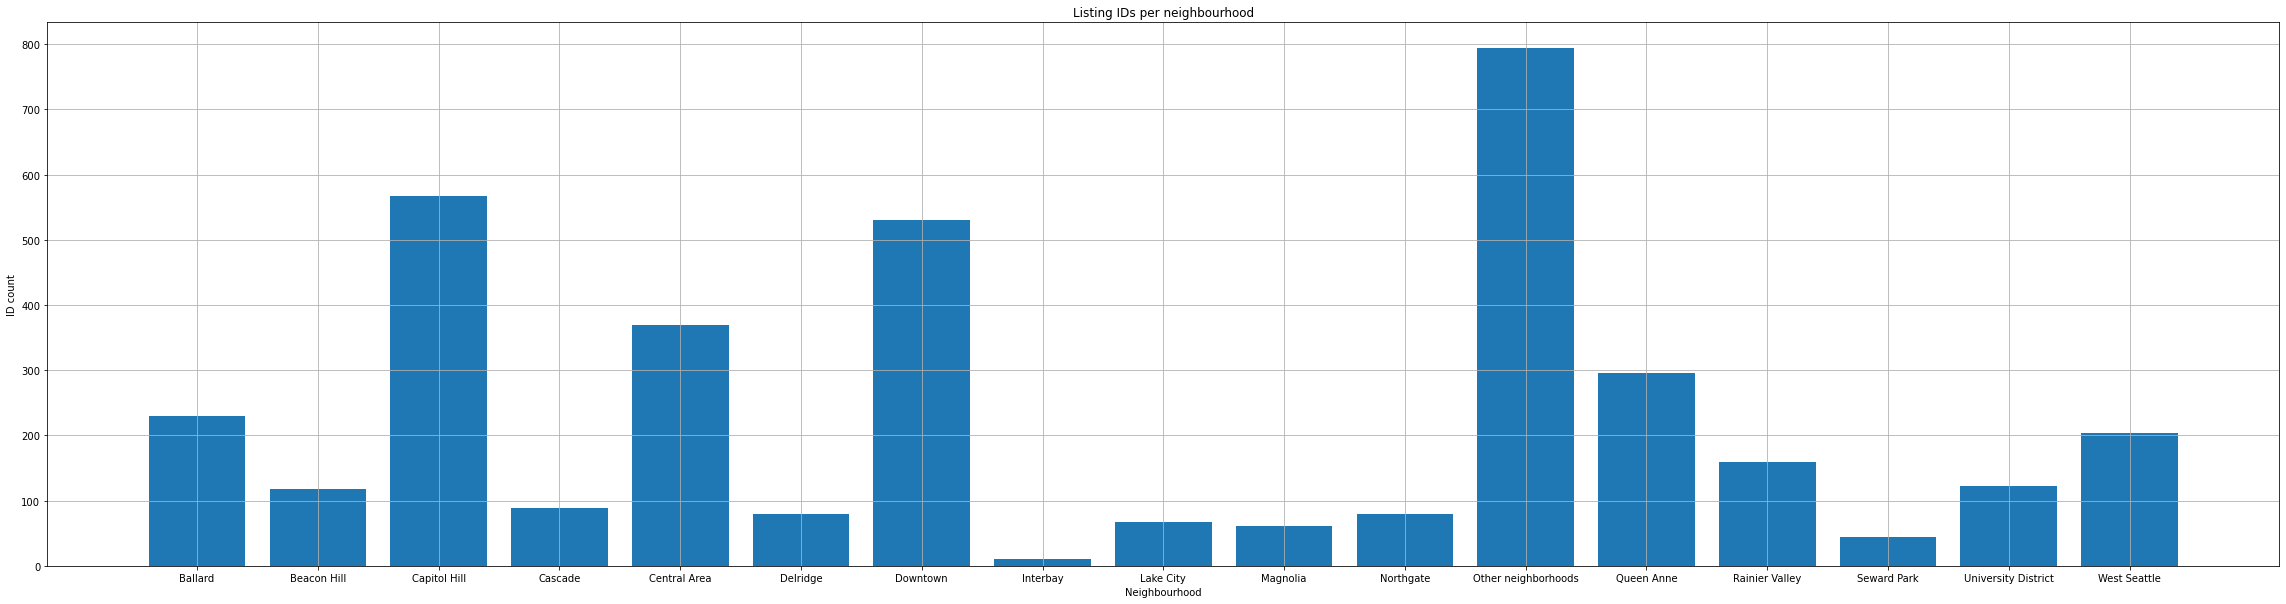

In [510]:
plt.figure(figsize=(40, 10))
x = df_listing_plot1['neighbourhood_group_cleansed']
y = df_listing_plot1['id']
plt.bar(x,y,linewidth=3.0)
plt.xlabel('Neighbourhood')
plt.ylabel('ID count')
plt.title('Listing IDs per neighbourhood')
plt.grid(True)
plt.show()

In [511]:
df_listing_plot2 = df_listing[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').mean()
df_listing_plot2.reset_index(inplace=True)
df_listing_plot2

,neighbourhood_group_cleansed,price
0,Ballard,124.682609
1,Beacon Hill,94.669492
2,Capitol Hill,130.592593
3,Cascade,140.101124
4,Central Area,128.338753
5,Delridge,83.278481
6,Downtown,154.405660
7,Interbay,109.727273
8,Lake City,92.671642
9,Magnolia,177.672131


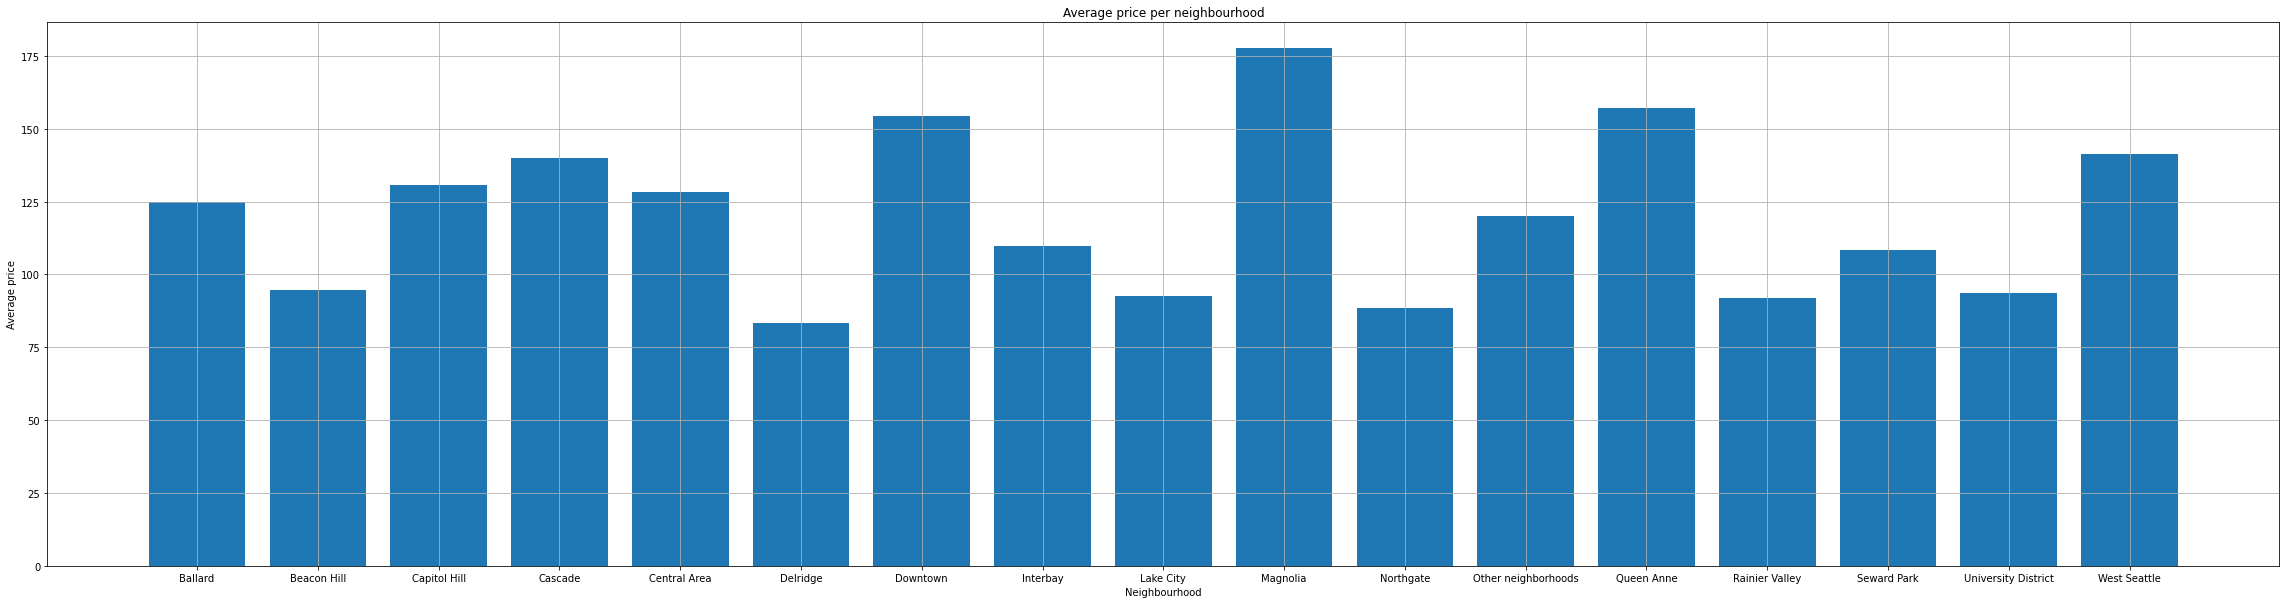

In [512]:
plt.figure(figsize=(40, 10))
x = df_listing_plot2['neighbourhood_group_cleansed']
y = df_listing_plot2['price']
plt.bar(x,y,linewidth=3.0)
plt.xlabel('Neighbourhood')
plt.ylabel('Average price')
plt.title('Average price per neighbourhood')
plt.grid(True)
plt.show()

# 3. Question: How can the price for a new listing be predicted?

For the prediction of the price I use the *df_listing_feature* dataset. I therefore build a simple Linear Regression model. 
I first have a look at the correllation of each feature on the price. 
This indicates that there are columns that impact the price more than others.

In [513]:
df_listing_features

,price,accommodates,bathrooms,bedrooms,beds,monthly_price,weekly_price,reviews_per_month,instant_bookable_t,cancellation_policy_moderate,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,85.0,4,1.0,1.0,1.0,2200.0,650.0,4.070000,0,1,...,0,0,0,0,0,1,0,0,0,0
1,150.0,4,1.0,1.0,1.0,3000.0,1000.0,1.480000,0,0,...,0,0,0,0,0,1,0,0,0,0
2,975.0,11,4.5,5.0,7.0,2200.0,650.0,1.150000,0,0,...,0,0,0,0,0,1,0,0,0,0
3,100.0,3,1.0,0.0,2.0,2300.0,650.0,2.078919,0,0,...,0,0,0,0,0,1,0,0,0,0
4,450.0,6,2.0,3.0,3.0,2200.0,650.0,0.890000,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,6,2.0,3.0,3.0,2200.0,650.0,0.300000,0,0,...,0,0,0,0,1,0,0,0,0,0
3814,79.0,4,1.0,1.0,2.0,2200.0,650.0,2.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
3815,93.0,2,1.0,1.0,1.0,2200.0,450.0,2.078919,0,1,...,0,0,0,0,0,0,1,0,0,0
3816,99.0,2,1.0,0.0,1.0,2200.0,650.0,2.078919,0,1,...,0,0,0,0,0,0,0,0,0,0


Correlation among numeric variables: 

price                                               1.000000
accommodates                                        0.652218
bathrooms                                           0.516017
bedrooms                                            0.627596
beds                                                0.589306
monthly_price                                       0.476477
weekly_price                                        0.605670
reviews_per_month                                  -0.199620
instant_bookable_t                                 -0.031712
cancellation_policy_moderate                       -0.102123
cancellation_policy_strict                          0.226632
neighbourhood_group_cleansed_Beacon Hill           -0.065915
neighbourhood_group_cleansed_Capitol Hill           0.012109
neighbourhood_group_cleansed_Cascade                0.020758
neighbourhood_group_cleansed_Central Area           0.001314
neighbourhood_group_cleansed_Delridge         

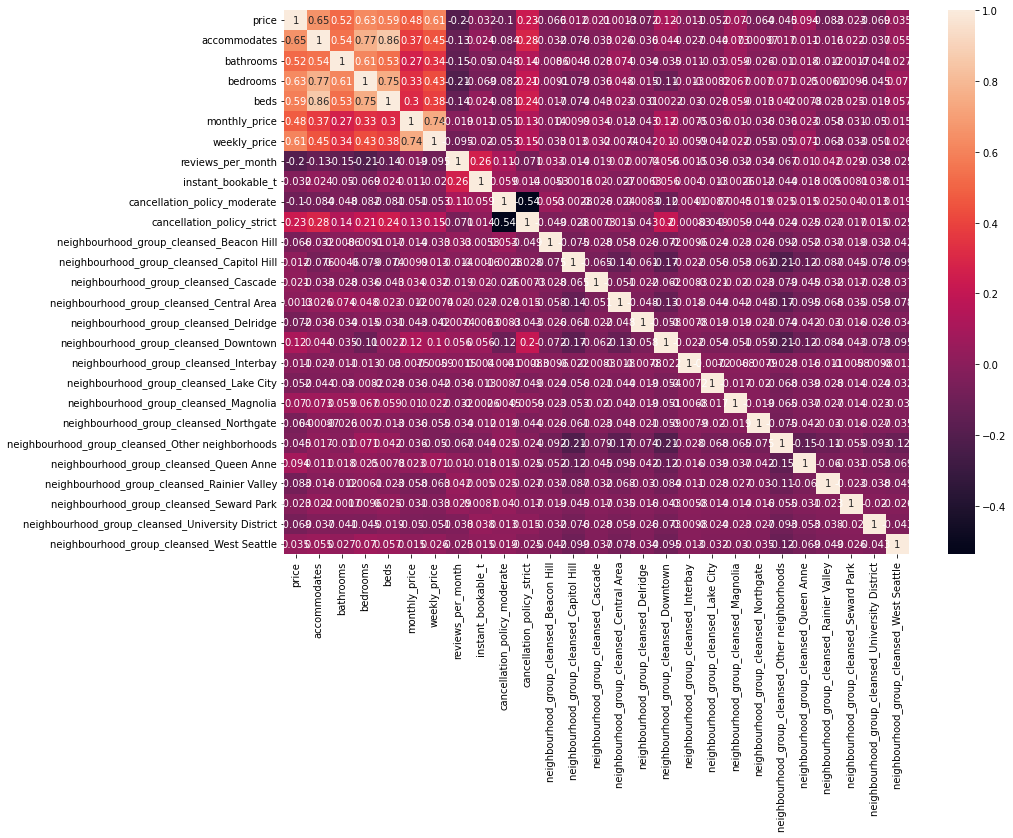

In [514]:
print('Correlation among numeric variables: \n')

plt.figure(figsize=(14,10))
corr = df_listing_features.corr()
print(corr['price'], '\n')

print('Present the result in heatmap: ')
sns.heatmap(corr, annot=True)
plt.show()

# Modelling

Here a Linear Regression model is implemented using a train/test split of 30%. 
The test score has a vlue of 0.62 and the training score of 0.61 which indicates that the model is not overfitted. 

In [518]:
y = df_listing_features['price']
X = df_listing_features.drop(columns = ['price'], inplace = False)

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [520]:
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')


test_score:  0.6169581851498428
train_score:  0.6113546602659741
The r-squared score for the model is 0.6169581851498428 on 1146 values. 



/Users/lena.rubeni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


# Evaluation

For the evaluation, I have a look at the differet columns and how the impact the result of the model. 

Rank features by their impact on the price: 
                                              feature       coef   abs_coef
15             neighbourhood_group_cleansed_Downtown  27.105733  27.105733
18             neighbourhood_group_cleansed_Magnolia  26.944510  26.944510
19            neighbourhood_group_cleansed_Northgate -24.024722  24.024722
21           neighbourhood_group_cleansed_Queen Anne  23.995577  23.995577
12              neighbourhood_group_cleansed_Cascade  20.650314  20.650314
1                                          bathrooms  20.032083  20.032083
2                                           bedrooms  18.377938  18.377938
14             neighbourhood_group_cleansed_Delridge -16.802921  16.802921
10          neighbourhood_group_cleansed_Beacon Hill -16.509551  16.509551
22       neighbourhood_group_cleansed_Rainier Valley -15.121579  15.121579
11         neighbourhood_group_cleansed_Capitol Hill  14.475324  14.475324
17            neighbourhood_group_cleansed_Lake City -

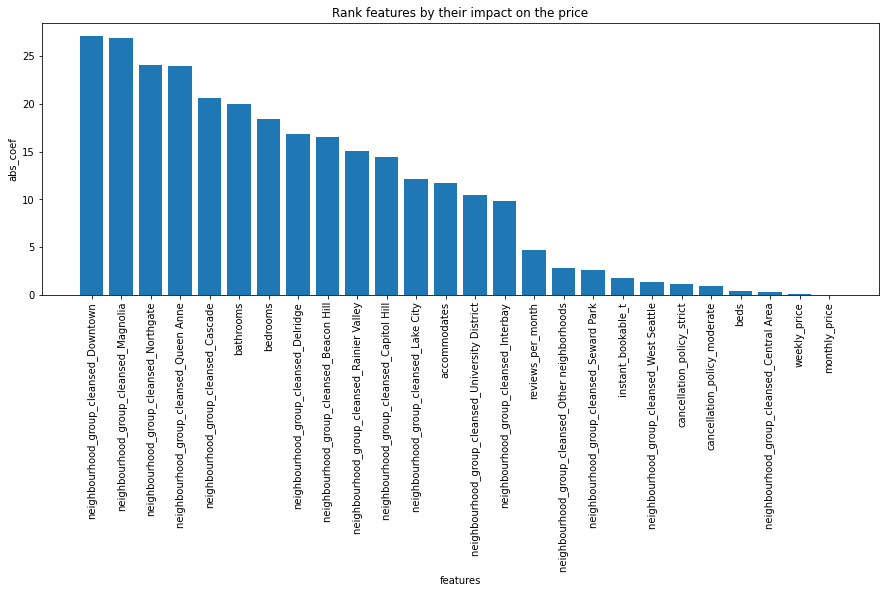

In [516]:


coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('features')
plt.xticks(coef_df['feature'], rotation = 90)
plt.ylabel('abs_coef')
plt.title('Rank features by their impact on the price')
plt.show()